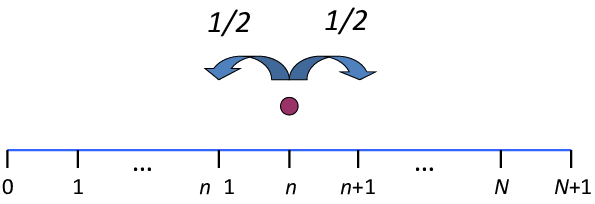

# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

 mean =     96.8963103689631
 variance=  553.5711902662348
 skewness=  [0. 0. 0. ... 0. 0. 0.]
 kurtosis=  [-3. -3. -3. ... -3. -3. -3.]


C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


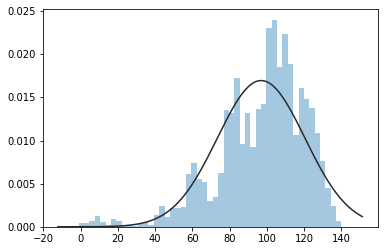

In [9]:
''''' It was my first try and a plan that i got from the question. but it's not true and realy correct'''''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

def Randomwalk(n ):

    
    y = 0
 
    
    leftright = [y]


    for i in range (1,n+1):
        dist = np.random.uniform(-1,1)

        if dist < 0:    
            
            y += 1  

        if dist > 0:    
            
            y -= 1

        
        leftright.append(y)

    return [ leftright]


walk = Randomwalk(10000)
# plt.plot(walk[0],walk[1], color= 'b')

print(' mean =    ' ,np.mean(walk))
print(' variance= ' ,np.var(walk))
print(' skewness= ' ,sp.skew(walk))
print(' kurtosis= ' ,sp.kurtosis(walk))
# plt.hist(Randomwalk(1e5), bins= 50)

sns.distplot(walk[0] , hist= True , kde= False, fit = sp.norm)
plt.show()

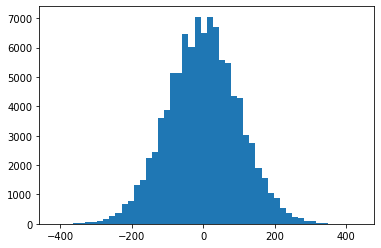

In [22]:
''' second try after class '''
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

def randwalk( steps, ensembles):
    ens_list = []
    for ens in range ( ensembles):
        step = [ 2 * np.random.randint(0, 2 , size =(steps)) - 1]
        endpoint = np.sum(step)
        ens_list.append(endpoint)
    return ens_list

walke = randwalk(10000,100000)
# print(walke)
# np.histogram(randwalk(100000,100000))

plt.hist(walke, bins= 50)
plt.show()

In [23]:
# moments
print(np.mean(np.array(walke)**1))
print(np.mean(np.array(walke)**2))
print(np.mean(np.array(walke)**3))
print(np.mean(np.array(walke)**4))

-0.37358
9972.23484
-8321.85656
134725288.72304


In [24]:
print(np.mean(walke))
print(np.var(walke))
print(sp.skew(walke))
print(sp.kurtosis(walke))

-0.37358
9972.0952779836
0.002866310806769082
0.0305490748545596


now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


In [ ]:
#explain here
'''
there is a senthense that philip Anderson says: more is different.\
as it's shows, my answer is yes. because it's a lot of random samples by the same chanses. it's make our probability become gaussian around 0.
'''

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean=  1666.3755624437556


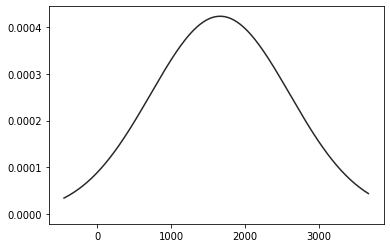

In [54]:
''' first try '''
def Randomwalk(n):

    y = 0

    leftright = [y] 
 
    for i in range (1,n+1):
        dist = np.random.uniform(0,1)
 
        if dist <= 0.66:    
            
            y += 1  
 
        if dist > 0.66:    
            
            y -= 1
  
        
        leftright.append(y)
 
    return  [leftright]

walk = Randomwalk(10000)


sns.distplot(walk[-1] , hist= False , kde= False, fit = sp.norm)
print('mean= ', np.mean(walk))

plt.show()

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


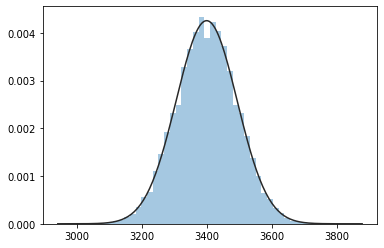

In [30]:
''' second try and true way'''

import numpy as np
import scipy.stats as sp


def randwalk( steps, ensembles):
    ens_list = []
    for ens in range ( ensembles):
        step =   np.random.choice([-1,1 ] , p= [0.33 , 0.67] , size = steps)
        # step = np.random.randit([-1,1] , size =(steps)) - 1]
        endpoint = np.sum(step)
        ens_list.append(endpoint)
    return ens_list

walke1 = randwalk(10000,100000)


#
sns.distplot(walke1 , hist= True , kde= False, fit = sp.norm)
#
# plt.hist(walke1, bins= 50)
plt.show()

In [31]:
#cumulents
print(' mean =     ' ,np.mean(walke1))
print(' variance = ' ,np.var(walke1))
print(' skewness = ' ,sp.skew(walke1))
print(' kurtosis = ' ,sp.kurtosis(walke1))

 mean =      3399.75482
 variance =  8795.1640067676
 skewness =  -0.0147008880621729
 kurtosis =  -0.007503670689361641


In [32]:
# moments
print('moments are :')
print(np.mean(np.array(walke1)**1))
print(np.mean(np.array(walke1)**2))
print(np.mean(np.array(walke1)**3))
print(np.mean(np.array(walke1)**4))

moments are :
3399.75482
11567128.00012
-1635940.63624
163205.79056


according to your result, can you tell how the shape of PDF function related to its cumulants?

In [ ]:
#explain here
'''
As we can see, when the probabity chaned, gaussian around 0 moved to Right. the moments and cunulents changed.
this function is symmetric around it's mean. variance become fewer. the max of function is less than first.  

'''

# Conditional Probability


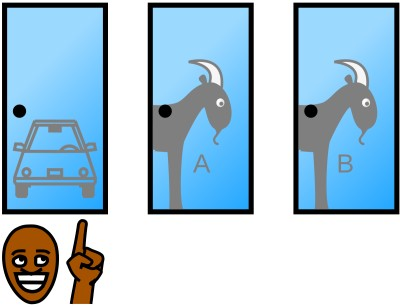

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)


#explain

we have 3 doors and each door has chance of 1/3. if we choose a door, so we have only 1/3 of the chance. when a goat door show up from 2 others doors, the chance of the door that we aren't choose, will be 2/3 not both of doors 1/2.
because we pick up 1/3 after reveal the goat door there is chance of 2/3 belong of our face.
so! it's better to switch our choice.

In [33]:
#code here

import random

doors = [1, 2, 3]
true = 0
false = 0
n = 10000

for i in range(n):
    car_door = random.choice(doors)
    my_choice = random.choice(doors)

    if my_choice == car_door:
        true += 1
    else:
        false += 1

chancet = true / (true + false)
chancef = false / (true + false)
print(' After', n ,'times: ')    
print(' your chance is' ,chancet ,' if you keep first choice.')
print(' your chance is' ,chancef ,' if switch your choise')


 After 10000 times: 
 your chance is 0.3402  if you keep first choice.
 your chance is 0.6598  if switch your choise


# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


In [34]:
# a
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

binomial = random.binomial(100000, 0.5, size = 100000)
uniform = random.uniform(0, 100000, size = 100000)
poisson = random.poisson(100000, size = 100000)


C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


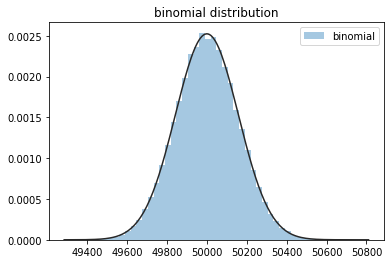

In [35]:
#binomial distribution
sns.distplot(binomial , hist= True, kde= False, fit = norm, label='binomial')
plt.title('binomial distribution')
plt.legend()
plt.show()

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


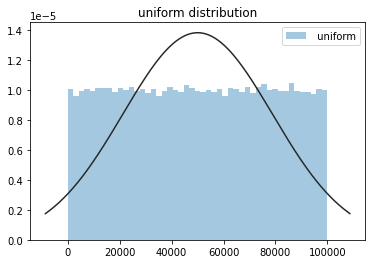

In [36]:
# uniform distribution
sns.distplot(uniform , hist= True, kde= False, fit = norm, label=' uniform')
plt.title('uniform distribution')
plt.legend()
plt.show()

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


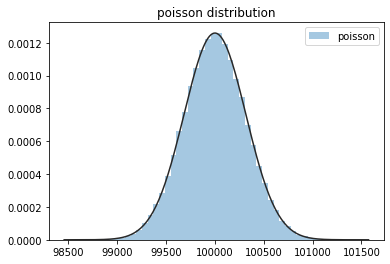

In [37]:
# poisson distribution
sns.distplot(poisson , hist= True, kde= False, fit = norm, label= 'poisson')
plt.title('poisson distribution')
plt.legend()
plt.show()

#create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.


C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

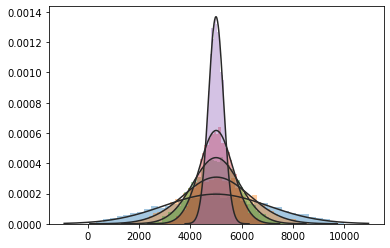

In [38]:
for i in (2, 5, 10, 20, 100):
    mean = np.array([np.mean(np.random.uniform(0, 10000, size = i)) for j in range (10000)])
    sns.distplot(mean , hist= True, kde= False, fit = sp.norm)
plt.show()

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


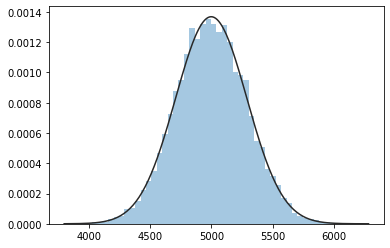

In [39]:
''' 
it's thother way
part by part
but it was mistake

'''

from random import uniform
uniform1 = uniform(0, 100000)
array2 = []
for i in range (2):
    
    array2.append(np.mean(np.random.uniform(0, 10000 , size = i)) for j in range (10000))
sns.distplot(mean , hist= True, kde= False, fit = sp.norm)


plt.show()


C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


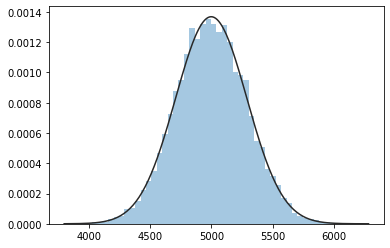

In [40]:
array5 = []
for i in range (5):
    
    array5.append(np.mean(np.random.uniform(0, 10000 , size = i)) for j in range (10000))
sns.distplot(mean , hist= True, kde= False, fit = sp.norm)

plt.show()

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


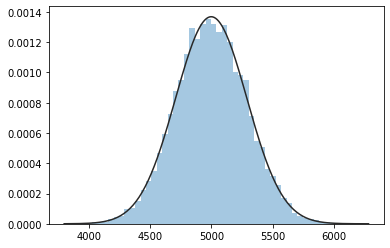

In [41]:
array10 = []
for i in range (10):
    
    array10.append(np.mean(np.random.uniform(0, 10000 , size = i)) for j in range (10000))
sns.distplot(mean , hist= True, kde= False, fit = sp.norm)

plt.show()

the 3 cell that i tried before, i let be in as you told at class.

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



 by changing the constant (p) the peaks will be change.  


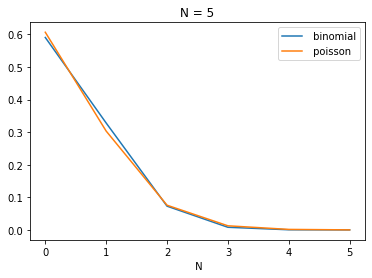

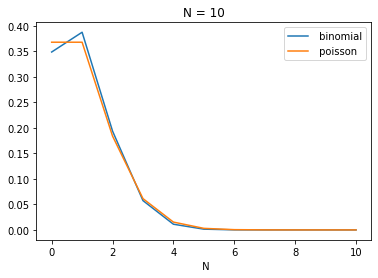

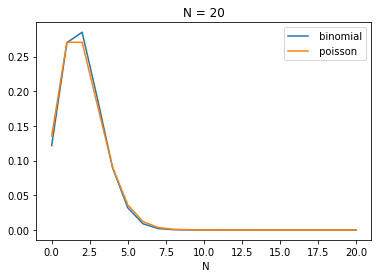

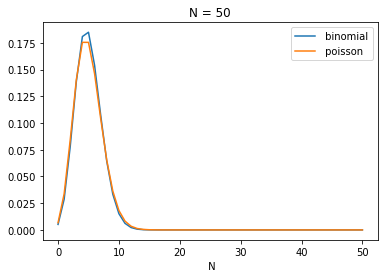

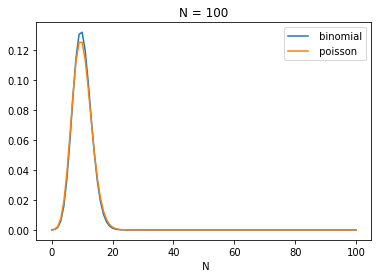

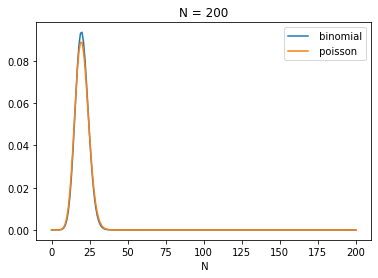

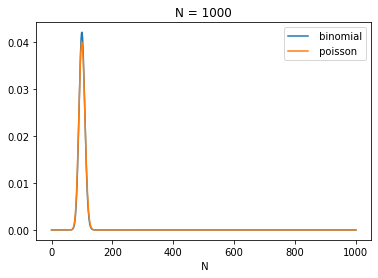

In [42]:
#code here

import scipy.stats as sp

import matplotlib.pyplot as plt

print(' by changing the constant (p) the peaks will be change.  ')
for N in (5,10,20,50,100, 200, 1000):
    
    t = np.arange(0, N+1)
    binomial = sp.binom.pmf(t, N , 0.1)
    poisson = sp.poisson.pmf(t, N * 0.1)




# print(binomial)
    plt.plot(t, binomial, label = ' binomial')
    plt.plot(t, poisson, label = ' poisson')
    plt.xlabel(' N')
    plt.title('N = {}'.format(N))
    plt.legend()
    plt.show()


# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


In [43]:
#code here

rand = np.random.rand(10000)
rand1 = rand[:5000]
rand2 = rand[5000:]

def transform(u1,u2):
    z1 = np.sqrt(-2* np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2* np.log(u1)) * np.sin(2 * np.pi * u2)
    return (z1,z2)

A = np.concatenate(transform(rand1 , rand2))

(array([  2.,   2.,   1.,   2.,   6.,   5.,   5.,   6.,  16.,  14.,  23.,
         33.,  30.,  44.,  58.,  75.,  90., 117., 140., 121., 191., 208.,
        226., 261., 293., 321., 325., 372., 383., 433., 419., 443., 442.,
        448., 444., 433., 391., 408., 353., 317., 292., 300., 240., 216.,
        203., 158., 133., 124., 105.,  85.,  55.,  35.,  46.,  29.,  18.,
         13.,  14.,   5.,   7.,   2.,   5.,   4.,   2.,   1.,   1.,   1.,
          2.,   2.,   0.,   1.]),
 array([-3.59288879, -3.4830038 , -3.37311881, -3.26323382, -3.15334884,
        -3.04346385, -2.93357886, -2.82369387, -2.71380888, -2.60392389,
        -2.4940389 , -2.38415392, -2.27426893, -2.16438394, -2.05449895,
        -1.94461396, -1.83472897, -1.72484398, -1.614959  , -1.50507401,
        -1.39518902, -1.28530403, -1.17541904, -1.06553405, -0.95564906,
        -0.84576408, -0.73587909, -0.6259941 , -0.51610911, -0.40622412,
        -0.29633913, -0.18645414, -0.07656916,  0.03331583,  0.14320082,
         0.

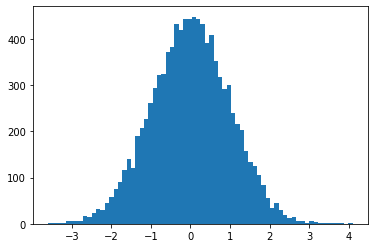

In [44]:
plt.hist(A , bins = 70)

b)Calculate mean of the sample. Its variance.

In [45]:
#code here

print('mean = ',np.mean(A))

print('variance = ',np.var(A))

mean =  -9.826825243978998e-05
variance =  0.9805344119828558


c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

std deviation =  0.9902193756854366


C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

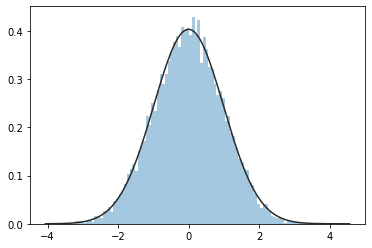

In [46]:
#code here
print( 'std deviation = ', np.std(A))
mean = np.mean(A)
variance = np.var(A)
sns.distplot(A , hist= True , kde= False, fit = sp.norm, bins = 100)

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

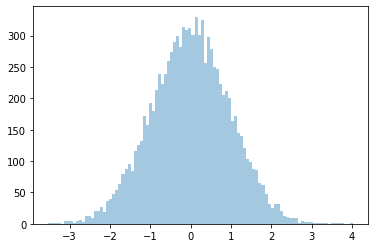

In [47]:
# variance and mean
var_and_std = mean + ( A * variance)
sns.distplot(var_and_std , hist= True , kde= False, bins = 100)

<AxesSubplot:>

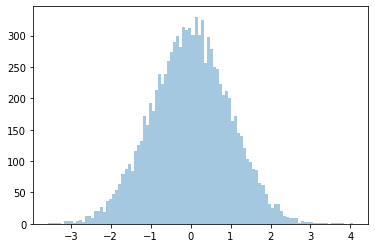

In [48]:
# std deviation and mean
std_deviation =  np.std(A)
std_and_mean = mean + ( A * std_deviation)
sns.distplot(std_and_mean , hist= True , kde= False, bins = 100)

In [ ]:
'''
yes. it seems they do agreee. that's awsome!
'''

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

(array([  2.,   2.,   1.,   2.,   6.,   5.,   5.,   6.,  16.,  14.,  23.,
         33.,  30.,  44.,  58.,  75.,  90., 117., 140., 121., 191., 208.,
        226., 261., 293., 321., 325., 372., 383., 433., 419., 443., 442.,
        448., 444., 433., 391., 408., 353., 317., 292., 300., 240., 216.,
        203., 158., 133., 124., 105.,  85.,  55.,  35.,  46.,  29.,  18.,
         13.,  14.,   5.,   7.,   2.,   5.,   4.,   2.,   1.,   1.,   1.,
          2.,   2.,   0.,   1.]),
 array([-12.37155516, -11.9320152 , -11.49247525, -11.0529353 ,
        -10.61339534, -10.17385539,  -9.73431543,  -9.29477548,
         -8.85523552,  -8.41569557,  -7.97615562,  -7.53661566,
         -7.09707571,  -6.65753575,  -6.2179958 ,  -5.77845584,
         -5.33891589,  -4.89937594,  -4.45983598,  -4.02029603,
         -3.58075607,  -3.14121612,  -2.70167616,  -2.26213621,
         -1.82259626,  -1.3830563 ,  -0.94351635,  -0.50397639,
         -0.06443644,   0.37510352,   0.81464347,   1.25418343,
          

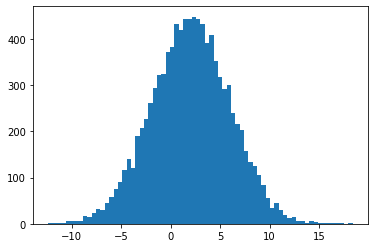

In [49]:
#code here

transf = 2 + ( 4 * A )
plt.hist(transf, bins= 70)

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [50]:
#code here

# n = int(input("enter n :"))
def matrix(n):
    M = [[n for i in range(n)] for j in range(n)] 
    return M

# print('matrix n*n : ' ,matrix(n))

print ('matrix 4*4 : ' ,matrix(4))
print ('matrix 5*5 : ' ,matrix(5))
print ('matrix 6*6 : ' ,matrix(6))

matrix 4*4 :  [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]]
matrix 5*5 :  [[5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5]]
matrix 6*6 :  [[6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6]]


# Honest and Liars

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [51]:
#code here 

people1 = []
for i in range(16):
    if i % 2 == 0:
        people1.append("l")
    else:
        people1.append("h")
# print(people1)
print('liars =',people1.count("l"))

people2 = []
for i in range(16):
    if i % 2 != 0:
        people2.append("l")
    else:
        people2.append("h")
# print(people2)
print('liars =',people2.count("l"))


people3 = []
for i in range(16):
    if i % 3 != 0:
        people3.append("l")
    else:
        people3.append("h")
# print(people3)
print('liars =',people3.count("l"))


people4 = []
for i in range(16):
    if (i  % 3 != 0 or i % 3 == 1):
        people4.append("l")
    else:
        people4.append("h")
# print(people4)
print('liars =',people4.count("l"))


people5 = []
for i  in range(1,17):
    if (i  % 2 != 0 or i % 3 == 0):
        people5.append("l")
    else:
        people5.append("h")
# print(people5)
print('liars =',people5.count("l"))





liars = 8
liars = 8
liars = 10
liars = 10
liars = 10
